## 5.2.2 데이터 내려받기 

### 5-4 훈련, 검증, 테스트 폴더로 이미지 복사하기

In [1]:
import os, shutil

original_dataset_dir = './datasets/cats_and_dogs/train'

base_dir = './datasets/cats_and_dogs_small'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


## 5.2.3 네트워크 구성하기

### 5-5 강아지 vs. 고양이 분류를 위한 소규모 컨브넷 만들기

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

### 5-6 모델의 훈련 설정하기

In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

## 5.2.4 데이터 전처리 

### 5-7 ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기 

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


* 파이썬 제너레이터 이해하기

In [7]:
def generator():
    i = 0
    while True:
        i+=1
        yield i
        
for item in generator():
    print(item)
    if item > 4:
        break

1
2
3
4
5


In [8]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


### 5-8 배치 제너레이터를 사용하여 모델 훈련하기

In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6874 - acc: 0.5395 - val_loss: 0.6743 - val_acc: 0.5710
Epoch 2/30
100/100 [==============================] - 6s 55ms/step - loss: 0.6588 - acc: 0.6090 - val_loss: 0.6467 - val_acc: 0.6140
Epoch 3/30
100/100 [==============================] - 6s 55ms/step - loss: 0.6226 - acc: 0.6435 - val_loss: 0.6111 - val_acc: 0.6780
Epoch 4/30
100/100 [==============================] - 6s 55ms/step - loss: 0.5860 - acc: 0.6875 - val_loss: 0.6221 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 6s 55ms/step - loss: 0.5509 - acc: 0.7335 - val_loss: 0.5912 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 6s 56ms/step - loss: 0.5121 - acc: 0.7405 - val_loss: 0.5608 - val_acc: 0.7160
Epoch 7/30
100/100 [==============================] - 6s 55ms/step - loss: 0.4866 - acc: 0.7630 - val_loss: 0.6152 - val_acc: 0.6760
Epoch 8/30
100/100 [==============================] - 6s 55ms/step - 

### 5-9 모델 저장하기 

In [10]:
model.save('cats_and_dogs_small_1.h5')

### 5-10 훈련의 정확도와 손실 그래프 그리기

In [11]:
%matplotlib inline

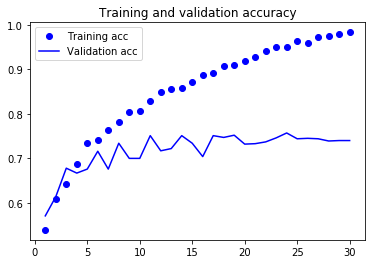

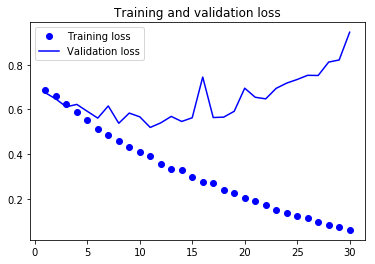

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 5.2.5 데이터 증식 사용하기 

### 5-11 ImageDataGenerator를 사용하여 데이터 증식 설정하기 

In [13]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

### 5-12 랜덤하게 증식된 훈련 이미지 그리기

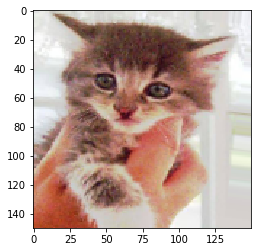

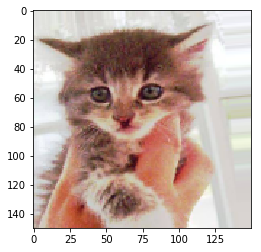

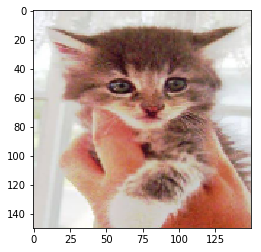

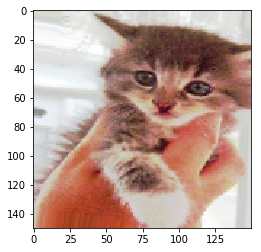

In [14]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for
                fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### 5-13 드롭아웃을 포함한 새로운 컨브넷 정의하기

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

### 5-14 데이터 증식 제너레이터를 사용하여 컨브넷 훈련하기

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 19s 191ms/step - loss: 0.6906 - acc: 0.5300 - val_loss: 0.6768 - val_acc: 0.5857
Epoch 2/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6832 - acc: 0.5547 - val_loss: 0.6619 - val_acc: 0.5915
Epoch 3/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6677 - acc: 0.5984 - val_loss: 0.6777 - val_acc: 0.5647
Epoch 4/100
100/100 [==============================] - 18s 175ms/step - loss: 0.6542 - acc: 0.6091 - val_loss: 0.6296 - val_acc: 0.6372
Epoch 5/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6396 - acc: 0.6316 - val_loss: 0.6060 - val_acc: 0.6764
Epoch 6/100
100/100 [==============================] - 19s 188ms/step - loss: 0.6120 - acc: 0.6587 - val_loss: 0.6158 - val_acc: 0.6579
Epoch 7/100
100/100 [==============================] - 17s 174ms/step - loss: 0.6003 - acc: 0.6822 -

100/100 [==============================] - 17s 171ms/step - loss: 0.4212 - acc: 0.8019 - val_loss: 0.4395 - val_acc: 0.8014
Epoch 61/100
100/100 [==============================] - 17s 174ms/step - loss: 0.4137 - acc: 0.8131 - val_loss: 0.4331 - val_acc: 0.8048
Epoch 62/100
100/100 [==============================] - 17s 173ms/step - loss: 0.4140 - acc: 0.8056 - val_loss: 0.4781 - val_acc: 0.7563
Epoch 63/100
100/100 [==============================] - 18s 178ms/step - loss: 0.4029 - acc: 0.8162 - val_loss: 0.4582 - val_acc: 0.7970
Epoch 64/100
100/100 [==============================] - 17s 171ms/step - loss: 0.4105 - acc: 0.8081 - val_loss: 0.4469 - val_acc: 0.8003
Epoch 65/100
100/100 [==============================] - 17s 173ms/step - loss: 0.4128 - acc: 0.8122 - val_loss: 0.4763 - val_acc: 0.7881
Epoch 66/100
100/100 [==============================] - 17s 172ms/step - loss: 0.4090 - acc: 0.8059 - val_loss: 0.4593 - val_acc: 0.7899
Epoch 67/100
100/100 [==============================] 

### 5-15 모델 저장하기

In [17]:
model.save('cats_and_dogs_small_2.h5')